In [1]:
from netCDF4 import Dataset
import iris
import numpy as np
import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature
from datetime import datetime


In [5]:
#filename = '/Users/ananth/Downloads/SM_sden_ERA5_01Aug1980-31Jul2021_v01.nc'
#cube = iris.load(filename)

filename = '/Users/ananth/Downloads/SM_snod_ERA5_01Aug1980-31Jul2021_v01.nc'
cube = iris.load(filename)

lat_index = 0
lon_index = 0
snowdepth_index = 0
for i in range(2):
    varname = cube[i].var_name
    if varname == 'snod':
        snowdepth_index = i

snow_depth_org = cube[snowdepth_index].data


filename4 = '/Users/ananth/Downloads/icemotion_weekly_nh_25km_19781105_19781231_v4.1.nc'
cube4 = iris.load(filename4)

lat_index = 0
lon_index = 0

for i in range(5):
    varname = cube4[i].var_name
    if varname == 'latitude':
        lat_index = i
    elif varname == 'longitude':
        lon_index = i
        
lon = cube4[lon_index].data
lat = cube4[lat_index].data

snow_depth = snow_depth_org[-365:,:,:].data # this is for the one year .. slice 

snow_depth_1yr = snow_depth_org[1,:,:].data


/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/iris/fileformats/cf.py:649: UserWarning: Missing CF-netCDF grid mapping variable 'lambert_azimuthal_equal_area', referenced by netCDF variable 'snod'
  warnings.warn(message % (name, nc_var_name))


In [6]:
snow_depth_1yr = snow_depth_org[1,:,:].data
snow_depth_1yr[snow_depth_1yr<0] = 0
snow_depth = np.mean(snow_depth_1yr,axis=0)
np.max(snow_depth)

0.0026887453

IndexError: boolean index did not match indexed array along dimension 0; dimension is 130321 but corresponding boolean dimension is 361

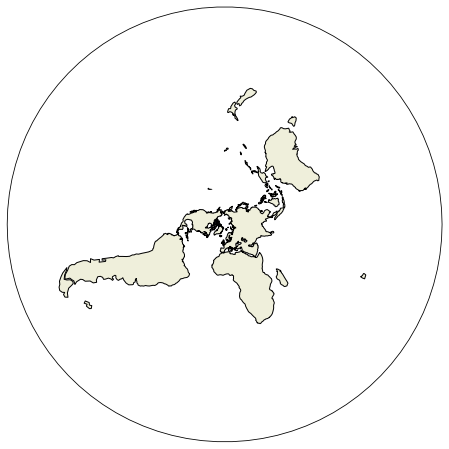

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,8),  subplot_kw={'projection': ccrs.NorthPolarStereo()})

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
#ax.add_feature(cartopy.feature.OCEAN)

lat_1d = lat.flatten();
lon_1d = lon.flatten();

snowdepth_1d = snow_depth.flatten()*100

j = np.isnan(snowdepth_1d)
s_depth_slice = snowdepth_1d[~j]
lat_slice = lat_1d[~j]
lon_slice = lon_1d[~j]

#colors = snowdepth_1d/np.max(snowdepth_1d_depth_slice)

#colors = snowdepth_1d


colors = s_depth_slice


im = ax.scatter(lon_slice, lat_slice,c = colors,s = 100, marker = '.',transform = ccrs.PlateCarree(),zorder = 5)
cb = fig.colorbar(im,ax=ax,fraction=0.046, pad=0.04)
ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())
ax.gridlines()

"""         
#ax.scatter(lat[])
#ax.colorbar()
ax.set_title('Snow depth in the Arctic (cm)',fontsize=25)
cb.ax.tick_params(labelsize=18)
#ax.legend(fontsize='x-large')
ax.gridlines()
"""

In [12]:
lon


masked_array(
  data=[[ -45.      ,  -44.8404  ,  -44.679916, ...,   44.679916,
           44.8404  ,   45.      ],
        [ -45.1596  ,  -45.      ,  -44.839508, ...,   44.839508,
           45.      ,   45.1596  ],
        [ -45.320084,  -45.160492,  -45.      , ...,   45.      ,
           45.160492,   45.320084],
        ...,
        [-134.67992 , -134.83951 , -135.      , ...,  135.      ,
          134.83951 ,  134.67992 ],
        [-134.84041 , -135.      , -135.16049 , ...,  135.16049 ,
          135.      ,  134.84041 ],
        [-135.      , -135.15959 , -135.32008 , ...,  135.32008 ,
          135.15959 ,  135.      ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [15]:
cube[1].var_name

'snod'

In [23]:
cube2

[<iris 'Cube' of snow depth (m) / (unknown) (time: 14975; -- : 361; -- : 361)>,
<iris 'Cube' of mapping / (unknown) (scalar cube)>]

In [14]:
np.shape(cube2[1].data)

()

In [15]:
cube2

[<iris 'Cube' of snow depth (m) / (unknown) (time: 14975; -- : 361; -- : 361)>,
<iris 'Cube' of mapping / (unknown) (scalar cube)>]

In [16]:
cube2[0]

<iris 'Cube' of snow depth (m) / (unknown) (time: 14975; -- : 361; -- : 361)>

In [17]:
filename3 = '/Users/ananth/Downloads/SM_sden_MERRA2_01Aug1980-31Jul2021_v01.nc'
cube3 = iris.load(filename3)

/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/iris/fileformats/cf.py:649: UserWarning: Missing CF-netCDF grid mapping variable 'lambert_azimuthal_equal_area', referenced by netCDF variable 'sden'
  warnings.warn(message % (name, nc_var_name))


In [18]:
cube3

[<iris 'Cube' of snow density (kg/m3) / (unknown) (time: 14975; -- : 361; -- : 361)>,
<iris 'Cube' of mapping / (unknown) (scalar cube)>]

In [19]:
361*2

722

In [39]:
filename4 = '/Users/ananth/Downloads/icemotion_weekly_nh_25km_19781105_19781231_v4.1.nc'
cube4 = iris.load(filename4)
cube4

[<iris 'Cube' of latitude / (degrees) (-- : 361; -- : 361)>,
<iris 'Cube' of longitude / (degrees) (-- : 361; -- : 361)>,
<iris 'Cube' of number_of_observations / (1) (time: 52; -- : 361; -- : 361)>,
<iris 'Cube' of sea_ice_x_velocity / (cm / s) (time: 52; projection_y_coordinate: 361; projection_x_coordinate: 361)>,
<iris 'Cube' of sea_ice_y_velocity / (cm / s) (time: 52; projection_y_coordinate: 361; projection_x_coordinate: 361)>]

In [56]:
#start_date = '08-01-1980'
#date_1 = datetime.strptime(start_date,'%m-%d-%Y').date()

start_date = '08/01/1980'
date_1 = datetime.strptime(start_date,'%m/%d/%Y').date()
#x = datetime.datetime.strptime('08/01/1980','%m/%d/%y')

In [65]:
from datetime import datetime,timedelta

datetime_str = '09/19/22'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y')

In [60]:
date_1

datetime.date(1980, 8, 1)

In [66]:
date_1+timedelta(days = 1)

datetime.date(1980, 8, 2)